In [2]:
import tensorflow as tf

In [54]:
from tensorflow.keras.layers import Flatten, Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from tensorflow.keras.datasets import imdb

## Load dataset

In [55]:
start_char = 1
oov_char = 2
index_from = 3
vocab_size = 10000
max_len = 50

In [50]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [51]:
word_index = imdb.get_word_index()

In [52]:

index_word = {value+index_from:key for key,value in word_index.items()}
index_word[start_char] = "[START]"
index_word[oov_char] = "[OOV]"

In [53]:
" ".join([index_word.get(i) for i in x_test[0]])

"[START] please give this one a miss br br [OOV] [OOV] and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite [OOV] so all you madison fans give this a miss"

In [56]:
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

In [101]:
model = Sequential([
    Embedding(vocab_size, 128 , input_length= max_len),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [102]:
history = model.fit(padded_x_train, y_train, batch_size=32, epochs=10 ,validation_data=(padded_x_test, y_test))



Epoch 1/10


782/782 [==============================] - 4s 5ms/step - loss: 0.4939 - accuracy: 0.7566 - val_loss: 0.3940 - val_accuracy: 0.8198
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2490 - accuracy: 0.9036 - val_loss: 0.4121 - val_accuracy: 0.8141
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0830 - accuracy: 0.9846 - val_loss: 0.4648 - val_accuracy: 0.8066
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0200 - accuracy: 0.9994 - val_loss: 0.5154 - val_accuracy: 0.8064
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.5587 - val_accuracy: 0.8065
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5971 - val_accuracy: 0.8058
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6321 - val_accuracy: 0.8060
Epoch 8/10
782/78

In [85]:
history.history.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

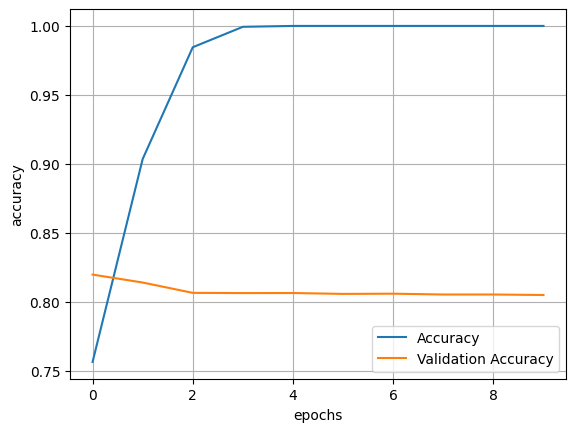

In [103]:
acc  = history.history['accuracy']
val_acc  = history.history['val_accuracy']
plt.plot(range(len(acc)), acc  )
plt.plot(range(len(val_acc)), val_acc )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.grid()



In [104]:
model_rnn = Sequential([
    Embedding(vocab_size, 128 , input_length= max_len ),
    SimpleRNN( 128, activation='relu'),
    Dense(1, activation= 'sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [105]:
history_rnn = model_rnn.fit(padded_x_train, y_train, batch_size=32, epochs=10 , validation_data=(padded_x_test, y_test))

Epoch 1/10
782/782 [==============================] - 12s 15ms/step - loss: 0.5324 - accuracy: 0.7131 - val_loss: 0.4431 - val_accuracy: 0.7961
Epoch 2/10
782/782 [==============================] - 11s 15ms/step - loss: 0.3445 - accuracy: 0.8497 - val_loss: 0.4132 - val_accuracy: 0.8136
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.2508 - accuracy: 0.8962 - val_loss: 0.4622 - val_accuracy: 0.8090
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1855 - accuracy: 0.9249 - val_loss: 0.5506 - val_accuracy: 0.7988
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1464 - accuracy: 0.9422 - val_loss: 0.5756 - val_accuracy: 0.7825
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1135 - accuracy: 0.9587 - val_loss: 0.6531 - val_accuracy: 0.7875
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0860 - accuracy: 0.9690 - val_loss: 0.8305 - val_accuracy:

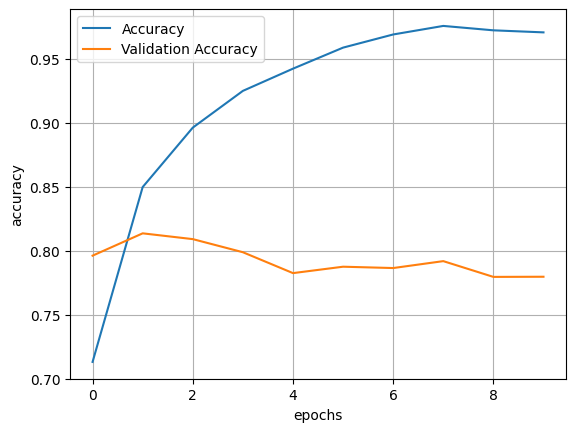

In [106]:
acc  = history_rnn.history['accuracy']
val_acc  = history_rnn.history['val_accuracy']
plt.plot(range(len(acc)), acc  )
plt.plot(range(len(val_acc)), val_acc )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.grid()

## Save models

In [108]:
model.save('output/simple_ann_imdb.h5')
model_rnn.save('output/simple_rnn_imdb.h5')

/Users/tanweersalah/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
